In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Utility function: save plot

In [4]:
def save_png(index, optimizer):    
    x, y = optimizer.max['params']['x'], optimizer.max['params']['y']
    
    XY = np.append(xx, yy).reshape(-1, 2, order='F')
    
    mean, sigma = optimizer._gp.predict(XY , return_std=True)
    
    ax1.imshow(zz, origin=[0,0])
    ax1.set_title('Target function')
    
    ax2.set_title('Prediction')
    ax2.imshow(mean.reshape(xx.shape), origin=[0,0])
    
    ax3.set_title('Variance')
    ax3.imshow(sigma.reshape(xx.shape), origin=[0,0])
    
    ax4.set_title('(Target-prediction)$^2$')
    ax4.imshow((zz-mean.reshape(xx.shape))**2, origin=[0,0])

    for point in past_points:
        for ax in (ax1, ax2, ax3, ax4):
            ax.scatter(point['x'], point['y'], color='white', s=10)
            ax.set_xlim(0, 150)
            ax.set_ylim(0, 100)
            ax.scatter(x, y, color='red')
            ax.hlines(next_point_to_probe['y'], 0, 150)
            ax.vlines(next_point_to_probe['x'], 0, 100)
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    fig.savefig(f'./imgs/frame{index}.png')
    plt.close('all')

### Black box function

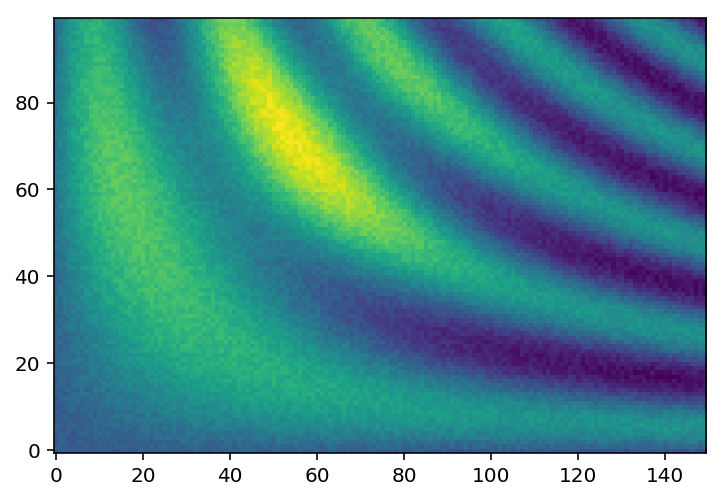

In [5]:
def black(x, y):
    s = np.sin(x*y*0.002)
    g = np.exp(-(x-50)**2/2000 -(y-70)**2/2000)*2
    return s+g+np.random.random(x.shape)/3

yy, xx = np.mgrid[0:100, 0:150]
zz = black(xx, yy)

plt.imshow(zz, origin=[0,0])

## Comparison between differentacquisition functions 

### Upper confidence bound

$\alpha$ = mean + kappa $\cdot$ std

In [5]:
optimizer = BayesianOptimization(
    f=black,
    pbounds={'x': (0, 150), 'y': (0, 100)},
    verbose=2,
    random_state=30)

## mean + kappa * std
utility = UtilityFunction(kind="ucb", kappa=25., xi=None)
past_points = []

In [6]:
for index in range(100):
    print('\rIndex = ', index, end='')
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,6))
    next_point_to_probe = optimizer.suggest(utility)
    past_points.append(next_point_to_probe)

    target = black(**next_point_to_probe)
    optimizer.register(params=next_point_to_probe, target=target)
    
    save_png(index, optimizer)

Index =  99

In [ ]:
# !ffmpeg -f image2 -framerate 2 -i imgs/frame%d.png ufc.gif

![ufc](ufc.gif "ufc")

### Expected improvement

z = (mean-y$_{max}$-xi)/std

$\alpha$ =(mean - y$_{max}$ - xi) $\cdot$ norm.cdf(z) + std $\cdot$ norm.pdf(z)

In [6]:
optimizer = BayesianOptimization(
    f=black,
    pbounds={'x': (0, 150), 'y': (0, 100)},
    verbose=2,
    random_state=30)

utility = UtilityFunction(kind="ei", xi=0.0, kappa=None)
past_points = []

In [7]:
for index in range(100):
    print('\rIndex = ', index, end='')
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,6))
    next_point_to_probe = optimizer.suggest(utility)
    past_points.append(next_point_to_probe)

    target = black(**next_point_to_probe)
    optimizer.register(params=next_point_to_probe, target=target)
    
    save_png(index, optimizer)

Index =  99

In [ ]:
# !ffmpeg -f image2 -framerate 2 -i imgs/frame%d.png ei.gif

![ei](ei.gif "ei")

### Probability of improvement

z = (mean-y$_{max}$-xi)/std

$\alpha$ = norm.cdf(z)

In [12]:
optimizer = BayesianOptimization(
    f=black,
    pbounds={'x': (0, 150), 'y': (0, 100)},
    verbose=2,
    random_state=30)

utility = UtilityFunction(kind="poi", xi=0.5, kappa=None)
past_points = []

In [13]:
for index in range(100):
    print('\rIndex = ', index, end='')
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,6))
    next_point_to_probe = optimizer.suggest(utility)
    past_points.append(next_point_to_probe)

    target = black(**next_point_to_probe)
    optimizer.register(params=next_point_to_probe, target=target)
    
    save_png(index, optimizer)

Index =  99

In [ ]:
# !ffmpeg -f image2 -framerate 2 -i imgs/frame%d.png poi.gif

![](poi.gif "")

In [ ]:
# import os
# import glob

# files = glob.glob('./imgs/*')
# for f in files:
#     os.remove(f)